In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
from scipy.interpolate import lagrange##插值处理

In [2]:
data = pd.read_excel('E:/vcdata/data/vcAmountaandTimes.xlsx') ###GDP ！= null
datavc = pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx') ###GDP ！= null

In [3]:
dataTimes = datavc.iloc[:,3+27:3+27*2]###times
TFind = []
T0 = []
c1 = dataTimes.columns
cityvc = datavc['City']
cityvcall = []
for i in range(len(dataTimes.columns)):
    timesFind = 0
    times0 = 0
    cityvcY = [] ###保存该年投资和人口都存在的城市
    for j in range(dataTimes.shape[0]):
        if dataTimes[c1[i]][j] > 0:
            timesFind += 1 ###投资次数不为0
            cityvcY.append(cityvc[j]) ###人口和投资都存在
        else:
            times0 += 1
    TFind.append(timesFind)
    T0.append(times0)
    cityvcall.append(cityvcY)

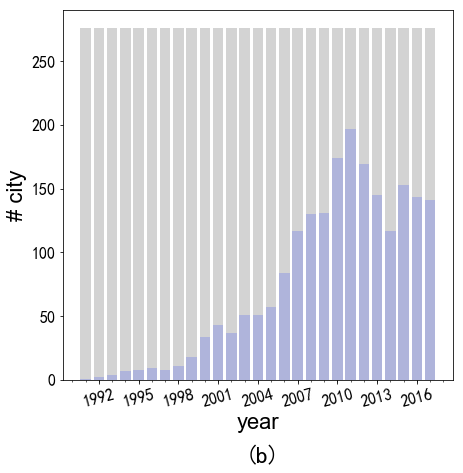

In [7]:
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
fig = plt.figure(figsize=(7,6.8))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('year',font2)
plt.ylabel('# city',font2)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(1991,2018)
# plt.xlim(1991,2018)
for i in range(27):
    plt.bar(x,TFind, zorder=4,color='#afb4db') 
    plt.bar(x,[TFind[i] + T0[i] for i in range(27)], zorder=2,color='lightgrey') 
# plt.text(2019,50,'TimesFind',fontsize = 12)
# plt.text(2019,200,'Times0',fontsize = 12)
plt.xticks(rotation=15)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(3)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.text(2003,-65,'(b)',fontsize=24)
# plt.savefig('E:/vcdata/pic/picSC/Fig1e.pdf', bbox_inches='tight')
plt.savefig('E:/0论文/2picture/2_7b.png',dpi=500, bbox_inches='tight')
plt.show()

In [8]:
### 累积 #######
cityNumT = []
city2 = list(set(cityvcall[0]).union(set(cityvcall[1])))
cityNumT.append(len(cityvcall[0]))
cityNumT.append(len(city2))
for i in range(2,27):   
    city1 = cityvcall[i]
    city2 = list(set(city1).union(set(city2)))
    cityNumT.append(len(city2))

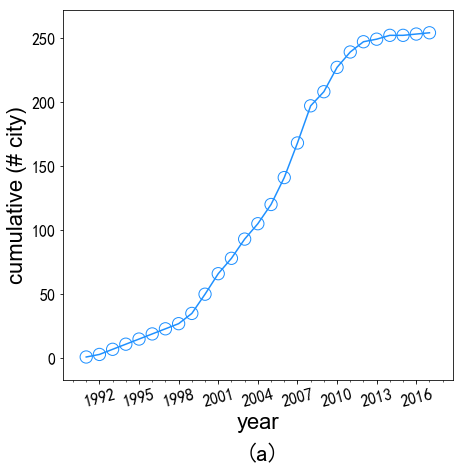

In [17]:
fig = plt.figure(figsize=(7,6.8))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('year',font2)
plt.ylabel('cumulative (# city)',font2)
plt.xticks(rotation=15)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(3)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(1991,2018)
# plt.xlim(1990,2018)
plt.plot(x,cityNumT,color='dodgerblue')
plt.scatter(x,cityNumT, color='', marker='o', edgecolors='dodgerblue', s=150) # 把 corlor 设置为空，通过edgecolors来控制颜色

plt.text(2003,-80,'(a)',fontsize=24)
plt.savefig('E:/0论文/2picture/2_7a.png',dpi=500, bbox_inches='tight')
# plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6e22(timesUnion).pdf', bbox_inches='tight')
plt.show()

In [22]:
len(cityNumT)

27

In [27]:
DFcityNumT = pd.DataFrame()
DFcityNumT['year'] = x
DFcityNumT['cityNumT'] = cityNumT

In [30]:
DFcityNumT

,year,cityNumT
0,1991,1
1,1992,3
2,1993,7
3,1994,11
4,1995,15
5,1996,19
6,1997,23
7,1998,27
8,1999,35
9,2000,50
